In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
df = pd.read_excel('lab336.xlsx')

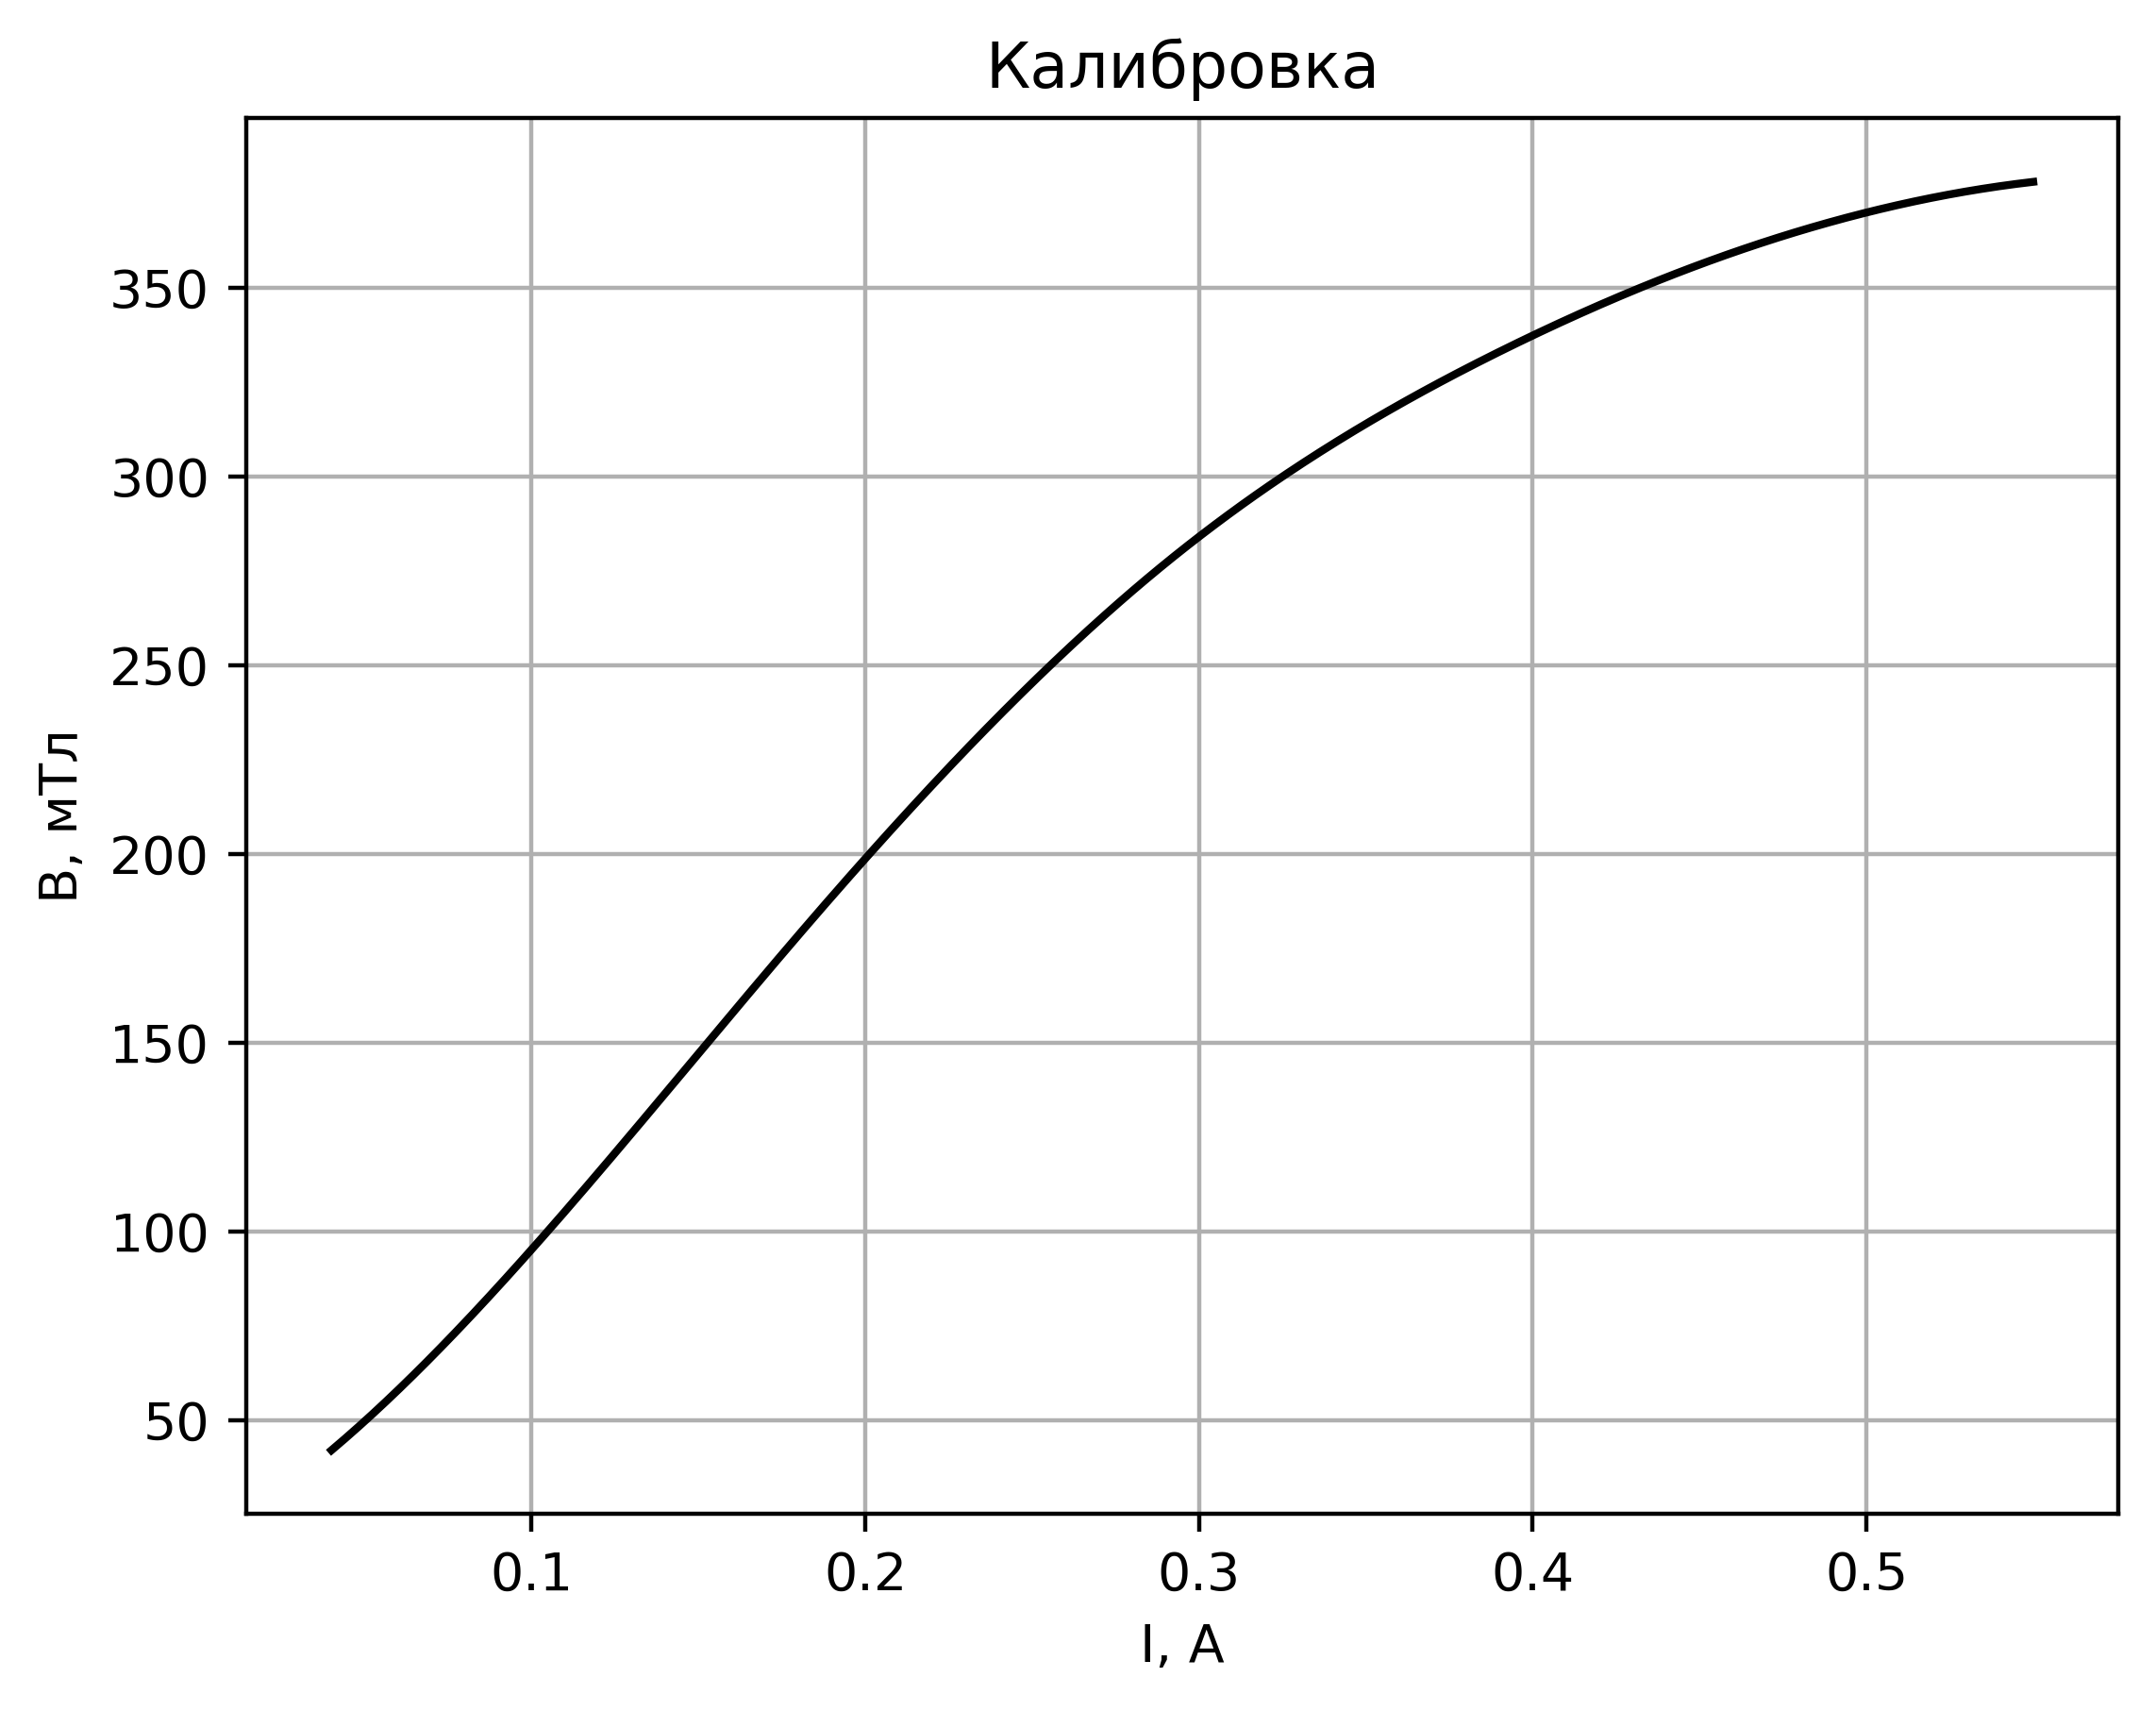

In [4]:
## Калбировка
B = np.array(df.iloc[0:7, 0])
I = np.array(df.iloc[0:7, 1])

f = interp1d(I, B, kind= 'cubic', fill_value='extrapolate')
I_smooth = np.linspace(0.04, 0.55, 500)
B_smooth = f(I_smooth)

plt.figure(dpi= 400)
plt.plot(I_smooth, B_smooth, color = 'black')
plt.xlabel('I, А')
plt.ylabel('B, мТл')
plt.title('Калибровка')
plt.grid(True)
plt.savefig('calibration.png')


In [5]:
U_perp = np.array(df.iloc[2:13, 2], dtype= float)
I_perp = np.array(df.iloc[2:13, 3], dtype= float)
U_par = np.array(df.iloc[2:13, 4], dtype= float)
I_par = np.array(df.iloc[2:13, 5], dtype= float)
U_disk = np.array(df.iloc[2:13, 6], dtype= float)
I_disk = np.array(df.iloc[2:13, 7], dtype= float)

R_perp = U_perp/0.01
R_par = U_par/0.01
R_disk = U_disk/0.0235

np.savetxt('R_perp.txt', R_perp, fmt = '%.3f')
np.savetxt('R_par.txt', R_par, fmt = '%.3f')
np.savetxt('R_disk.txt', R_disk, fmt = '%.3f')

B2_perp = f(I_perp)**2 / 10**4
B2_par = f(I_par)**2 / 10**4
B2_disk = f(I_disk)**2 / 10**4

np.savetxt('B_perp.txt', B2_perp, fmt = '%.3f')
np.savetxt('B_par.txt', B2_par, fmt = '%.3f')
np.savetxt('B_disk.txt', B2_disk, fmt = '%.3f')

f1 = np.polyfit(B2_perp, R_perp, 1)
f2 = np.polyfit(B2_par, R_par, 1)
f3 = np.polyfit(B2_disk, R_disk, 1)

R_perp_new = np.polyval(f1, B2_perp)
R_par_new = np.polyval(f2, B2_par)
R_disk_new = np.polyval(f3, B2_disk)


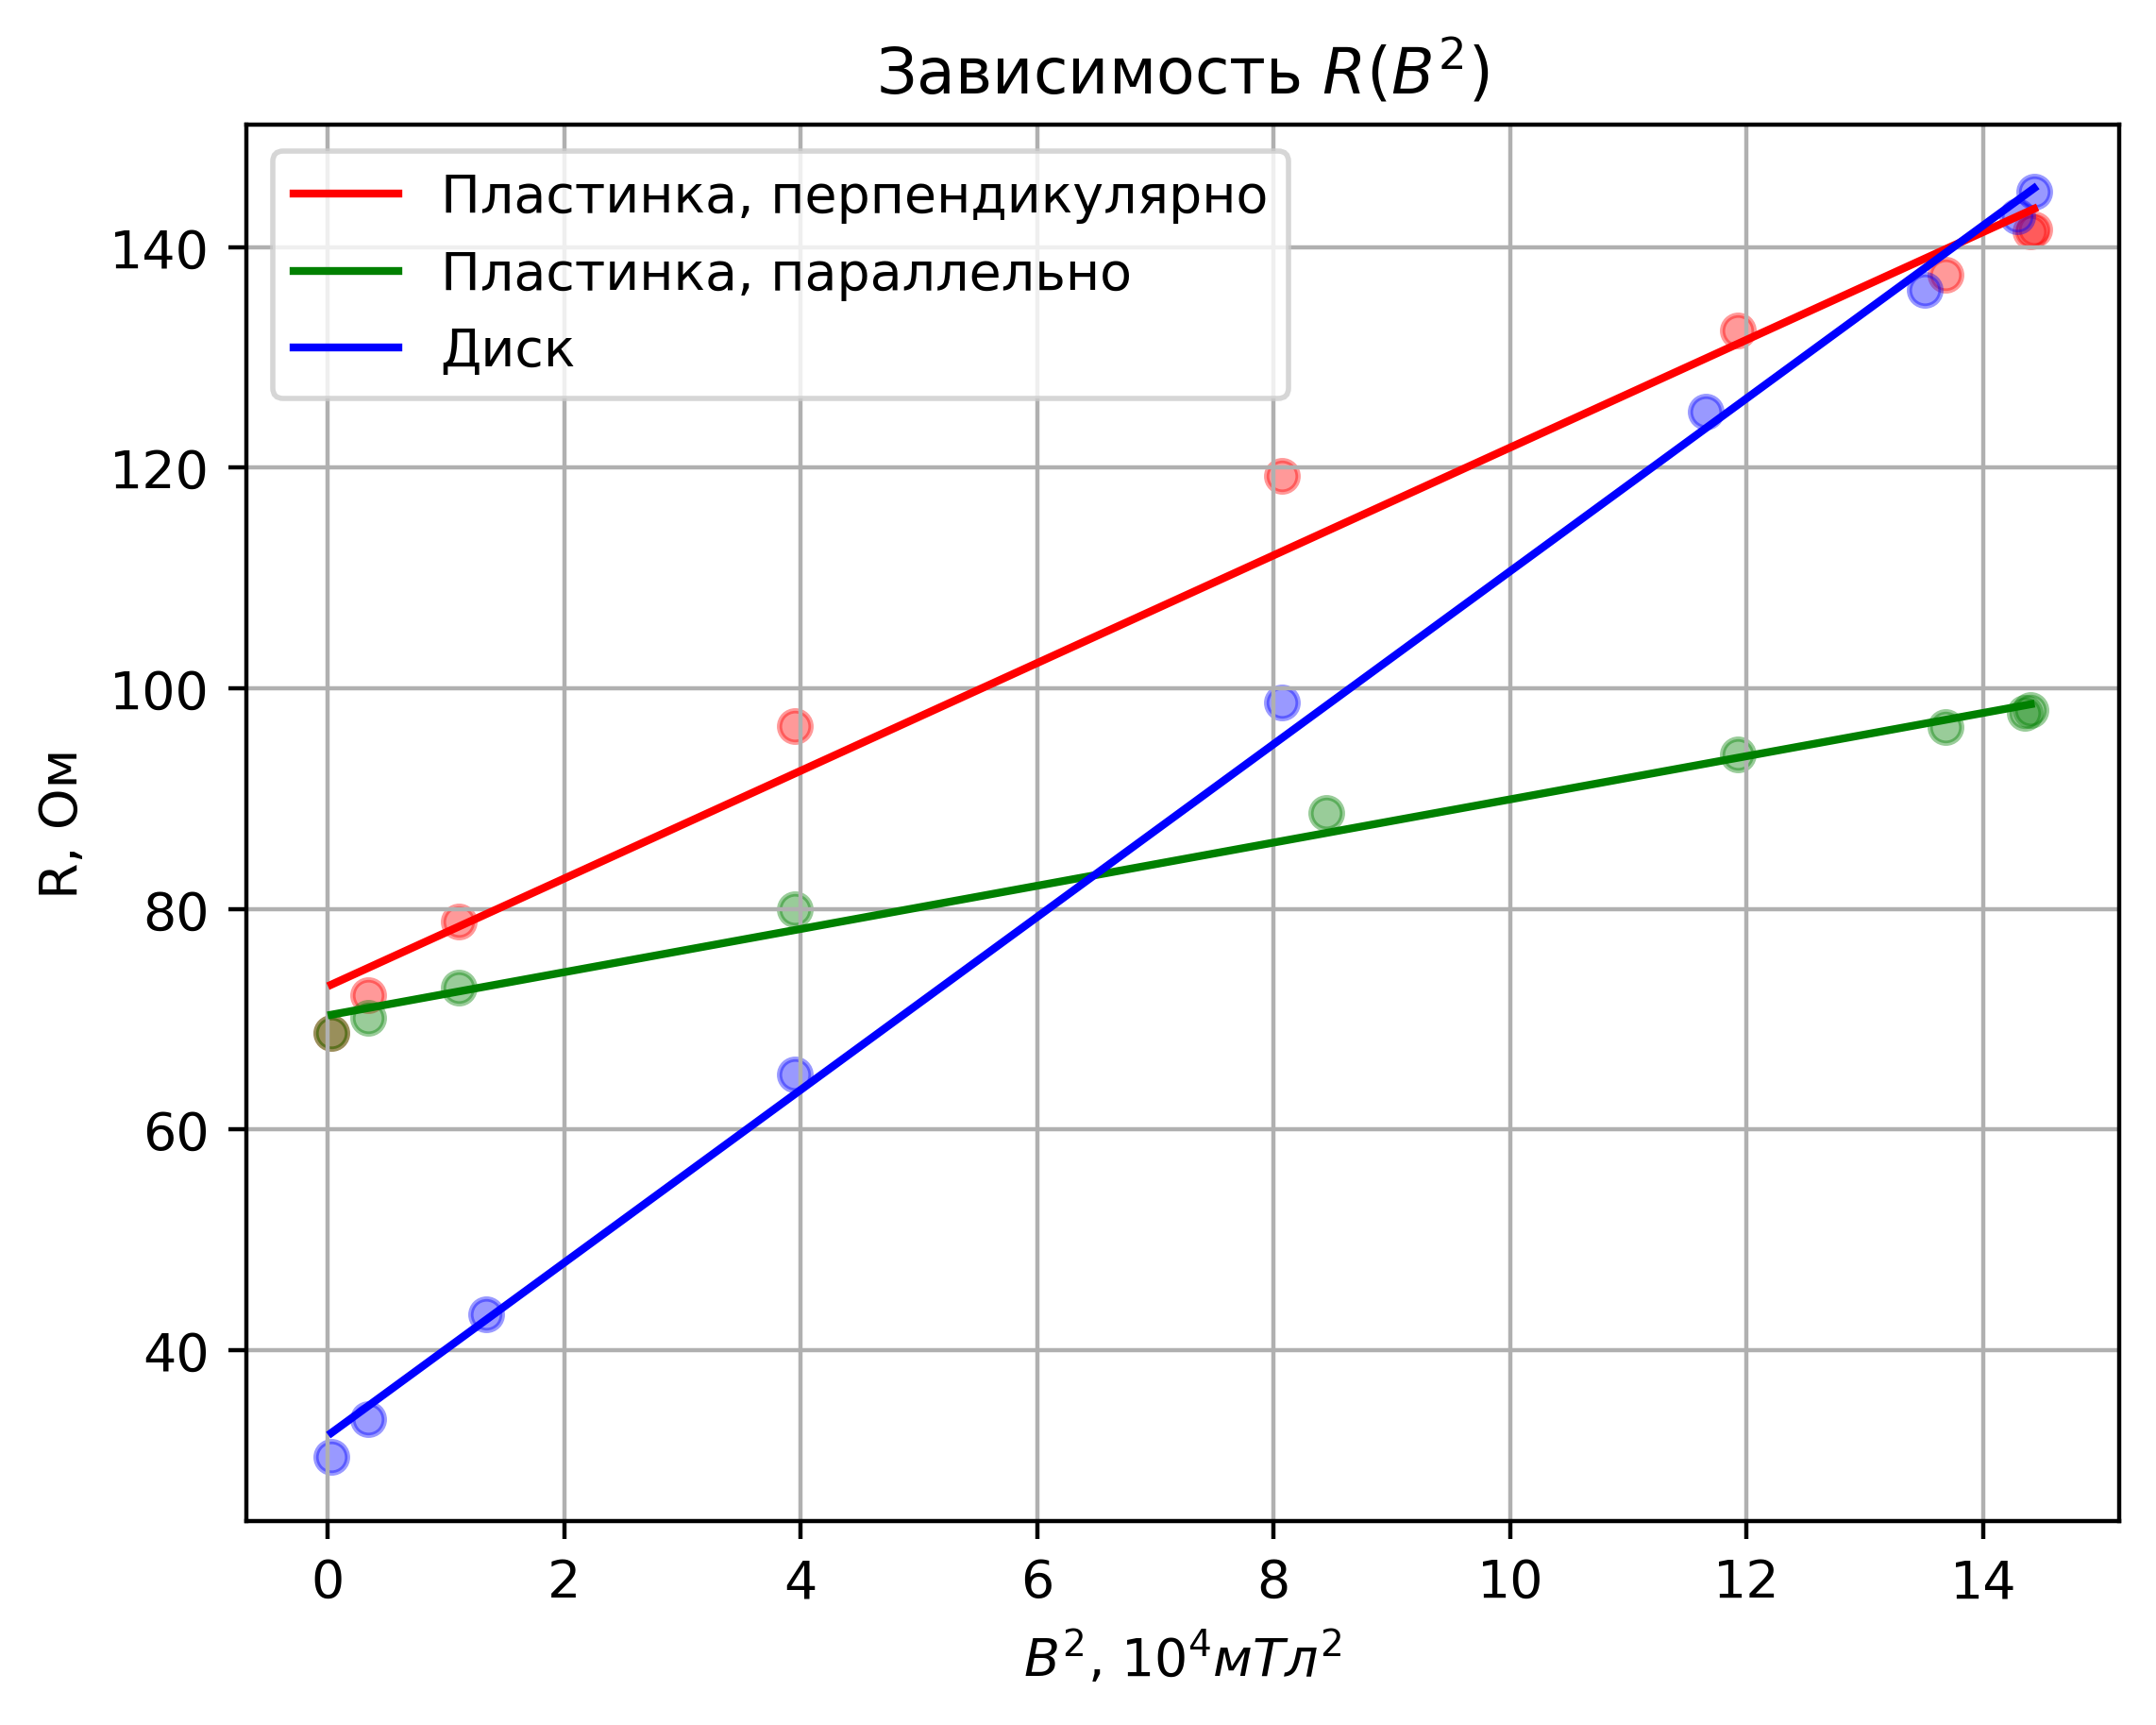

In [12]:
plt.figure(dpi= 400)
plt.scatter(B2_perp, R_perp, c='red', alpha= 0.4)
plt.plot(B2_perp, R_perp_new, c='red', label = 'Пластинка, перпендикулярно')

plt.scatter(B2_par, R_par, c='green', alpha= 0.4)
plt.plot(B2_par, R_par_new, c='green', label = 'Пластинка, параллельно')

plt.scatter(B2_disk, R_disk, c='blue', alpha= 0.4)
plt.plot(B2_disk, R_disk_new, c='blue', label = 'Диск')

plt.legend()
plt.xlabel('$B^2$, $10^{4} мТл^2$')
plt.ylabel('R, Ом')
plt.title('Зависимость $R(B^2)$')
plt.grid(True)
plt.savefig('B2.png')